In [1]:
# Import data /structuring

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#import data csv

train_data_orig=pd.read_csv("C:/Documents/Kaggale/Titanic/Data/train.csv")
test_data_orig=pd.read_csv("C:/Documents/Kaggale/Titanic/Data/test.csv")

# convert empty cell to zero
train_data_orig.fillna(0, inplace=True)
test_data_orig.fillna(0, inplace=True)

# data structuring 
y_train_orig=train_data_orig["Survived"]
features=["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
X_train_orig=pd.get_dummies(train_data_orig[features])

# feature scaling
delta=max(X_train_orig.Age)-min(X_train_orig.Age)
min_val=min(X_train_orig.Age)
X_train_orig.Age=(1/delta)*(X_train_orig.Age-min_val)+1

delta=max(X_train_orig.Fare)-min(X_train_orig.Fare)
min_val=min(X_train_orig.Fare)
X_train_orig.Fare=(1/delta)*(X_train_orig.Fare-min_val)+5

# split data to train and test sets
m_train=691
n_test=len(y_train_orig)-m_train
Y_train=y_train_orig[0:m_train].T
Y_test=y_train_orig[m_train:len(y_train_orig)].T
X_train=X_train_orig[0:m_train].T
X_test=X_train_orig[m_train:len(y_train_orig)].T



In [2]:
#Actication function
# sigmoid
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [3]:
#  layer_sizes
def layer_sizes(X, Y):
   
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y=1
    return (n_x, n_h, n_y)
(n_x, n_h, n_y) = layer_sizes(X_train, Y_train)

In [4]:
#  initialize_parameters
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) 
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

parameters = initialize_parameters(n_x, n_h, n_y)

In [5]:
#  forward_propagation

def forward_propagation(X, parameters):
   
    W1 =parameters["W1"]
    b1 =parameters["b1"]
    W2 =parameters["W2"]
    b2 =parameters["b2"]
   
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
A2, cache = forward_propagation(X_train, parameters)

In [6]:
# compute_cost

def compute_cost(A2, Y, parameters):
    
    m = Y.shape[0] 

    cost = (-1/m)*(np.dot(Y,np.log(A2).T)+np.dot(1-Y,np.log(1-A2).T))
    cost = float(np.squeeze(cost))  
                                    
    assert(isinstance(cost, float))
    
    return cost
cost= compute_cost(A2,Y_train,parameters)


def backward_propagation(parameters, cache, X, Y):
   
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
    A1 = cache["A1"]
    A2 = cache["A2"]
   
    dZ2 = A2-np.array(Y)
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
grads = backward_propagation(parameters, cache, X_train, Y_train)

In [7]:
# update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
   
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

parameters = update_parameters(parameters, grads)

In [8]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
       
        # Forward propagation
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function
        cost = compute_cost(A2,Y,parameters)
 
        # Backpropagation
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update
        parameters = update_parameters(parameters,grads)
        
        # Print the cost 
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
parameters = nn_model(X_train, Y_train, 4, num_iterations=20000, print_cost=True)


def predict(parameters, X):
    
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)*1
    
    return predictions

Y_prediction_train = predict(parameters, X_train)
Y_prediction_test = predict(parameters, X_test)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - np.array(Y_train))) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - np.array(Y_test))) * 100))

Cost after iteration 0: 0.693511
Cost after iteration 1000: 0.422622
Cost after iteration 2000: 0.386760
Cost after iteration 3000: 0.340495
Cost after iteration 4000: 0.372388
Cost after iteration 5000: 0.369463
Cost after iteration 6000: 0.368205
Cost after iteration 7000: 0.367299
Cost after iteration 8000: 0.366604
Cost after iteration 9000: 0.366045
Cost after iteration 10000: 0.365582
Cost after iteration 11000: 0.365186
Cost after iteration 12000: 0.364840
Cost after iteration 13000: 0.364533
Cost after iteration 14000: 0.364255
Cost after iteration 15000: 0.364000
Cost after iteration 16000: 0.363764
Cost after iteration 17000: 0.363543
Cost after iteration 18000: 0.363334
Cost after iteration 19000: 0.363138
train accuracy: 86.25180897250362 %
test accuracy: 82.5 %


249 184 73.89558232931726
442 84 19.004524886877828
249 182 73.09236947791165
442 31 7.013574660633484


Text(0.5, 1.0, 'Male Survival Rate-Prediction')

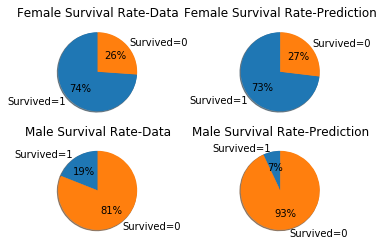

In [9]:
#Female / male predictions
#train
count_female=0
for i in range(len(Y_train)):
    if (X_train.T["Sex_female"][i]==1):
        count_female+=1
count_female1=0
for i in range(len(Y_train)):
    if ((X_train.T["Sex_female"][i]==1) and (Y_train[i]==1)):
        count_female1+=1
print(count_female,count_female1,100*count_female1/count_female) 


count_male=0
for i in range(len(Y_train)):
    if (X_train.T["Sex_male"][i]==1):
        count_male+=1
count_male1=0
for i in range(len(Y_train)):
    if ((X_train.T["Sex_male"][i]==1) and (Y_train[i]==1)):
        count_male1+=1
print(count_male,count_male1,100*count_male1/count_male)     

#prediction

count_female_predict=0
for i in range(len(Y_train)):
    if ((X_train.T["Sex_female"][i]==1) and (Y_prediction_train.flatten()[i]==1)):
        count_female_predict+=1
print(count_female,count_female_predict,100*count_female_predict/count_female) 

count_male_predict=0
for i in range(len(Y_train)):
    if ((X_train.T["Sex_male"][i]==1) and (Y_prediction_train.flatten()[i]==1)):
        count_male_predict+=1
print(count_male,count_male_predict,100*count_male_predict/count_male) 


import matplotlib.pyplot as plt
labels=['Survived=1','Survived=0']
female=[100*count_female1/count_female,100*(1-count_female1/count_female)]
female_predict=[100*count_female_predict/count_female,100*(1-count_female_predict/count_female)]
male=[100*count_male1/count_male,100*(1-count_male1/count_male)]
male_predict=[100*count_male_predict/count_male,100*(1-count_male_predict/count_male)]
fig1, ax1 = plt.subplots(2,2)
ax1[0,0].pie(female, labels=labels, 
        shadow=True, startangle=90, autopct='%1.0f%%')
ax1[0,0].set_title("Female Survival Rate-Data")


ax1[0,1].pie(female_predict, labels=labels, 
        shadow=True, startangle=90, autopct='%1.0f%%')
ax1[0,1].set_title("Female Survival Rate-Prediction")

ax1[1,0].pie(male, labels=labels, 
        shadow=True, startangle=90, autopct='%1.0f%%')
ax1[1,0].set_title("Male Survival Rate-Data")

ax1[1,1].pie(male_predict, labels=labels, 
        shadow=True, startangle=90, autopct='%1.0f%%')
ax1[1,1].set_title("Male Survival Rate-Prediction")

<BarContainer object of 2 artists>

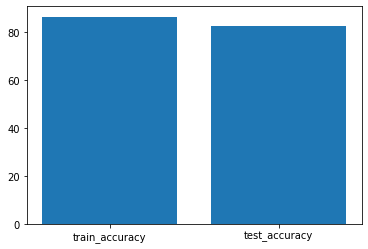

In [10]:
#train vs. dev.
train_accuracy=format(100 - np.mean(np.abs(Y_prediction_train - np.array(Y_train))) * 100)
test_accuracy=format(100 - np.mean(np.abs(Y_prediction_test - np.array(Y_test))) * 100)
from decimal import Decimal
train_accuracy=Decimal(train_accuracy)
train_accuracy=round(train_accuracy,2)
test_accuracy=Decimal(test_accuracy)
test_accuracy=round(test_accuracy,2)

accuracies=['train_accuracy','test_accuracy']
values=[train_accuracy,test_accuracy]
plt.bar(accuracies,values)

